# 1. Les adresses IP et le DNS



In [ ]:
10100001.10111111.10101000.00000000
10100001.10111111.10101111.01111011
161.191.168.0/21

161.191.175.123


# 1.1 IPv4

La norme IPv4 identifie les machines par 4 paquets de 8 bits (4 octets) :

```
01111011110101000010001000000001
```

Ces quatres octets sont souvent indiqués en décimal :

```
['123', '212', '34', '1']
```

La notation s'entend avec un séparateur qui est le point '.'

```
123.212.34.1
```

# 1.2 DNS

Il existe un système d'alias, ce sont **les noms de domaines**. Il serait difficile pour un utilisateur lambda de retenir les adresses des sites web qu'il interroge régulièrement sous cette forme. Des serveurs DNS permettent d'établir un lien entre les machines et un nom de domaine.

Par exemple si vous tapez l'adresse IP :
```
128.93.162.83
```
C'est comme si vous tapez l'adresse du site :

```
www.inria.fr
```
La deuxième chaîne est bien plus facilement mémorisable pour un humain.


[Ici un site pour trouver votre adresse IP ou l'adresse IP d'un serveur](http://www.mon-ip.com/adresse-ip-site-internet.php)




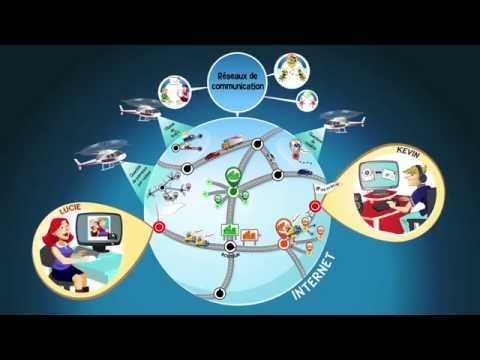

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('5AVY6E-7yCc')

## 1.3 Limite de IPv4 et Ipv6

On peut donc attribuer une adresse à $2^{32}$ Machines soit $4~294~967~296$ Machines.

Avec le dévelloppement du nombre d'appareils connectés, cela devient insuffisant et la norme IPv6 compatible est en ce moment en train de remplacer IPv4

[norme IPv6](https://fr.wikipedia.org/wiki/IPv6)

Cette norme permet l'adressage sur $128$ bits soit : $340$ sextillions adresses possibles.

$340~000~000~000~000~000~000~000~000~000~000~000~000$ Machines

## 1.4 Un peu de python (Décimal to Binaire) : Les IP.

On peut convertir un par un les octets en décimal ([convertisseur en ligne](http://sebastienguillon.com/test/javascript/convertisseur.html)) ou bien sûr le programmer en Python:

In [2]:

IP = input('Quelle IP ?')
# Test
# IP = '123.212.34.1'

# Cette fonction range les 4 nombres décimaux dans une liste.
def IPsplit(IP):
  T=IP.split('.')
  return(T)

print(IPsplit(IP))

# Cette fonction retourne l'IP correspondante à une chaîne binaire.
def binToIP(IPb) : 
  IP = ''
  IPb = IPsplit(IPb)
  IP = [int('0b'+c,2) for c in IPb] 
  return IP

# Cette fonction retourne la chaîne binaire correspondante.
def IPtobin(IP) : 
  IPb = IPsplit(IP)
  IPb = [int(i) for i in IPb] 
  IPb = [bin(i)[2:]  for i in IPb]
  return IPb 

print(IPtobin(IP))

# On complète les IP pour former quatre octets :
def to8(s) :
  while len(s)<8 :
    s = '0'+ s
  return s

def IPtobin4octets(IP) :
  IPb = IPtobin(IP)
  for i in range(4) :
    while len(IPb[i])<8 :
      IPb[i] = '0'+IPb[i]
  return IPb

IPb = IPtobin4octets(IP)
print(IPb)

def IPtobin32(IPb) :
  IPb32 = ''
  for i in range(4) :
    IPb32 += IPb[i]
  return IPb32 

print(IPtobin32(IPb))

Quelle IP ?0.0.0.0
['0', '0', '0', '0']
['0', '0', '0', '0']
['00000000', '00000000', '00000000', '00000000']
00000000000000000000000000000000


In [ ]:
 binToIP('01101111.10011001.00000101.11110000') 

[111, 153, 5, 240]

In [ ]:
 binToIP('01101111.10011001.00000101.11110010') 

[111, 153, 5, 242]

# 2. Sous réseaux

## 2.1. Principe de masque :

Un sous réseau est un ensemble d'appareils. On repère les appareils faisant partie d'un même sous réseau grâce à l'IP du sous réseau :


Exemple de sous réseau :
```
111.153.154.0/24
 
111.153.154.0
01101111100110011001101000000000
□■■□■■■■■□□■■□□■■□□■■□■□□□□□□□□□

24
11111111111111111111111100000000
■■■■■■■■■■■■■■■■■■■■■■■■□□□□□□□□
```



Toutes les machines dont l'IP commence par les 24 bits suivants :
```
011011111001100110011010
□■■□■■■■■□□■■□□■■□□■■□■□
```
font partie de ce sous réseaux.

Les bits complémentaires détermine quelle machine est destinataire dans le sous-réseau.




## 2.2. Longueur du masque et nombre de machines :

Si la longueur du masque du sous-réseau est de 24, il reste alors 8 bits pour identifier la machine. On pourra connecter $2^8$ machines soit 256 machines. Un peu moins en fait.

On imagine donc qu'une université ou unministe utiliseront des masque plus court pour gérer plus de machines dans leur réseau.

Un masque de longueur $20$ laisse $12$ bits pour identifier les machines soit $4096$ machines différentes.

La machine d'IP 111.153.154.111 fait partie de ce sous-réseau et une fois l'information dans le sous-réseau, seuls les 8 derniers bits permettent alors d'identifier le destinataire.
```
111.153.154.111
01101111100110011001101001101111
□■■□■■■■■□□■■□□■■□□■■□■□□■■□■■■■
```
Adresse de la machine localement :
```
001101111
□□■■□■■■■
```





# 3. Routeurs

## 2.1 Routeurs et IP réservées

Lorsqu'un routeur reçoit un paquet d'informations, il doit savoir à qui la distribuer, il y a deux cas principaux :

* Le paquet est destiné à une machine directement connectée à ce routeur, autrement dit **une machine qui fait partie de son sous-réseau**, alors il distribue directement le paquet à la machine.
* Le paquet est destiné à **une machine qui ne fait pas partie de son sous réseau**, alors il cherche dans sa table de routage le chemin qui rapproche le plus le paquet de sa destination.

Il existe plusieurs protocoles qui gère le deuxième cas pour pouvoir établir cette fameuse table de routage.

Autrement dit, la table de routage est un espèce d'annuaire qui met en parallèle les adresses IP des machines et les sorties (**interfaces**) sur lesquelles les envoyer.

Les routeurs sont des machines au même titre qu'un ordinateur, un smartphone ou bien une imprimante-wifi.

Certaines adresses IP sont destinés à faire de la diffusion vers toutes les machines d'un même sous réseau. Ces adresses de diffusion sont des **adresses de broadcast**

## 2.2 Table de routage (principe)

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('dCknqcjcItU')

### 2.3.1 Routage direct vers une machine du sous réseau

Lorsque le routeur reçoit un paquet d'information qui est adressé à une machine directement accessible, alors il transmets ces paquets à la machine en question.

Exemple : 
* Le routeur 111.153.154.1 peut joindre directement toutes les machines du sous-reśeau 111.153.154.0/24.
* S'il doit joindre la machine d'IP 111.153.154.111, il repère que les 24 premiers bits correspondent à son sous réseau. Il transmet à la machine en question.

Routeur :
```
111.153.154.1
01101111100110011001101000000001
□■■□■■■■■□□■■□□■■□□■■□■□□□□□□□□■
```
Sous Réseau :
```
111.153.154.0/24

111.153.154.0
01101111100110011001101000000000
□■■□■■■■■□□■■□□■■□□■■□■□□□□□□□□□

24
11111111111111111111111100000000
■■■■■■■■■■■■■■■■■■■■■■■■□□□□□□□□
```
Machine destinataire : 
```
111.153.154.111
01101111100110011001101001101111
□■■□■■■■■□□■■□□■■□□■■□■□□■■□■■■■
```






Ce qui se passe :
* Le routeur de voit que l'IP du destinataire fait partie du reśeau en comparant la partie de gauche de l'adresse destinataire à son sous réseau. 

```
□■■□■■■■■□□■■□□■■□□■■□■□□□□□□□□□
■■■■■■■■■■■■■■■■■■■■■■■■□□□□□□□□
□■■□■■■■■□□■■□□■■□□■■□■□□■■□■■■■
True
```

* Il envoit à la machine concernée dans son sous-réseau. 

```
□■■□■■■■■□□■■□□■■□□■■□■□□□□□□□□□
■■■■■■■■■■■■■■■■■■■■■■■■□□□□□□□□
□■■□■■■■■□□■■□□■■□□■■□■□□■■□■■■■
True
A envoyer à :
□□□□□□□□□□□□□□□□□□□□□□□□□■■□■■■■
```



### 2.3.2 Routage direct vers un autre sous-réseau

Lorsque le routeur reçoit un paquet d'information qui est n'est pas adressé à une machine directement accessible, alors il cherche à rapprocher cepaquet de son destinataire en fonction des élèments de sa **table de routage**. Il compare l'adresse du destinataire et choisi la sortie **interface** qui est adapté. C'est un peu comme un repertoire.

Exemple : 
* Le routeur doit transmettre l'information à 111.153.34.12
* Cette machine ne fait pas partie de son sous-réseau. Il cherche alors dans sa table de routage à quelle interface transmettre le paquet.
* Il trouve le sous-reseau 111.153.34.0/24 qui n'est pas directement accessible.
* Sa table de routage lui indique de transmettre le paquet à une certaine interface


Machine destinataire : 
```
111.153.34.12
01101111100110010010001000001100
□■■□■■■■■□□■■□□■□□■□□□■□□□□□■■□□
```






Ce qui se passe :
* Le routeur voit que l'IP du destinataire ne fait  pas partie de son sous-réeau en comparant la partie de gauche de l'adresse destinataire à son sous réseau. 

```
□■■□■■■■■□□■■□□■■□□■■□■□□□□□□□□□
■■■■■■■■■■■■■■■■■■■■■■■■□□□□□□□□
□■■□■■■■■□□■■□□■□□■□□□■□□□□□■■□□
False
```
Il cherche alors dans sa table de routage la plage d'adresses (le sous-réseau ) qui correspond au destinataire

```
□■■□■■■■■□□■■□□■□□■□□□■□□□□□■■□□
■■■■■■■■■■■■■■■■■■■■■■■■□□□□□□□□
□■■□■■■■■□□■■□□■□□■□□□■□□□□□■■□□
True
```

* Il envoit la paquet dans l'interface qui rapproche le message de son destinataire. 


## 2.3.3 Principe de routage :

Le routeur cherche dans sa table l'ensemble d'adresses (sous-réseau) dont fait parie l'adresse du destinataire, puis envoie le paquet d'information vers la bonne interface.


```
□■■□■■■■■□□■■□□■□■■□□■□□□□□□□□□□
■■■■■■■■■■■■■■■■■■■■■■■■□□□□□□□□
□■■□■■■■■□□■■□□■□□■□□□■□□□□□■■□□
False
□■■□■■■■■□□■■□□■□□□□■□■□■■■■□□□□
■■■■■■■■■■■■■■■■■■■■■■■■■■■■□□□□
□■■□■■■■■□□■■□□■□□■□□□■□□□□□■■□□
False
□■■□■■■■■□□■■□□■□■■□■■□□□□□□□□□□
■■■■■■■■■■■■■■■■■■■■■■■■□□□□□□□□
□■■□■■■■■□□■■□□■□□■□□□■□□□□□■■□□
False
□■■□■■■■■□□■■□□■□□■□□□■□□□□□□□□□
■■■■■■■■■■■■■■■■■■■■■■■■□□□□□□□□
□■■□■■■■■□□■■□□■□□■□□□■□□□□□■■□□
True
A envoyer à :
□□□□□□□□□□□□□□□□□□□□□□□□□□□□■■□□
```



# 3. Les codes Python de ce notebook

In [3]:
IPm = '0.0.0.0/0'

# Cette fonction sépare l'IP du sous-réseau de la longueur du masque
def splitmask(IPm):
  t = IPm.split('/')
  IP = t[0]
  IPb = IPtobin4octets(IP)
  m = int(t[1])
  return IP,IPb,m

IP,IPb,m = splitmask(IPm)

# Cette fonction transforme le masque en suite de 0 et 1
def mask(n):
  r=''
  for i in range (n) :
    r += '1'
  while len(r)<32 : 
    r += '0'
  return r

# Cette fonction traduit en noir et blanc une suite de 0 et 1 
def nbnb(s) :
  m=''
  for c in s :
    if c=='1' : 
      m += '\u25A0' 
    else :
      m += '\u25A1'
  return m


#SousReseau
print(IPm)
print()

print(IP)
print(IPtobin32(IPb))
print(nbnb(IPtobin32(IPb)))

print()
# Masque
print(m)
print(mask(m))
print(nbnb(mask(m)))

print()

0.0.0.0/0

0.0.0.0
00000000000000000000000000000000
□□□□□□□□□□□□□□□□□□□□□□□□□□□□□□□□

0
00000000000000000000000000000000
□□□□□□□□□□□□□□□□□□□□□□□□□□□□□□□□



In [4]:
RsR = ['111.153.100.0/24','111.153.10.240/28','111.153.108.0/24','111.153.34.0/24','111.153.35.0/24','111.153.154.0/24','111.153.240.0/20']

for IPm in RsR :
  IP,IPb,m = splitmask(IPm)
  #print(IPm)
  #print()
  #print(IP)
  print(IPtobin32(IPb))
  print(nbnb(IPtobin32(IPb)))
  #print()
  # Masque
  #print(m)
  #print(mask(m))
  print(nbnb(mask(m)))
  #print()


01101111100110010110010000000000
□■■□■■■■■□□■■□□■□■■□□■□□□□□□□□□□
■■■■■■■■■■■■■■■■■■■■■■■■□□□□□□□□
01101111100110010000101011110000
□■■□■■■■■□□■■□□■□□□□■□■□■■■■□□□□
■■■■■■■■■■■■■■■■■■■■■■■■■■■■□□□□
01101111100110010110110000000000
□■■□■■■■■□□■■□□■□■■□■■□□□□□□□□□□
■■■■■■■■■■■■■■■■■■■■■■■■□□□□□□□□
01101111100110010010001000000000
□■■□■■■■■□□■■□□■□□■□□□■□□□□□□□□□
■■■■■■■■■■■■■■■■■■■■■■■■□□□□□□□□
01101111100110010010001100000000
□■■□■■■■■□□■■□□■□□■□□□■■□□□□□□□□
■■■■■■■■■■■■■■■■■■■■■■■■□□□□□□□□
01101111100110011001101000000000
□■■□■■■■■□□■■□□■■□□■■□■□□□□□□□□□
■■■■■■■■■■■■■■■■■■■■■■■■□□□□□□□□
01101111100110011111000000000000
□■■□■■■■■□□■■□□■■■■■□□□□□□□□□□□□
■■■■■■■■■■■■■■■■■■■■□□□□□□□□□□□□


In [9]:
RsR = ['111.153.64.0/20','111.153.73.212/20','111.153.64.127/20','111.154.97.99/20']

for IPm in RsR :
  IP,IPb,m = splitmask(IPm)
  #print(IPm)
  #print()
  #print(IP)
  print(IPtobin32(IPb))
  print(nbnb(IPtobin32(IPb)))
  #print()
  # Masque
  #print(m)
  #print(mask(m))
  print(nbnb(mask(m)))
  #print()


01101111100110010100000000000000
□■■□■■■■■□□■■□□■□■□□□□□□□□□□□□□□
■■■■■■■■■■■■■■■■■■■■□□□□□□□□□□□□
01101111100110010100100111010100
□■■□■■■■■□□■■□□■□■□□■□□■■■□■□■□□
■■■■■■■■■■■■■■■■■■■■□□□□□□□□□□□□
01101111100110010100000001111111
□■■□■■■■■□□■■□□■□■□□□□□□□■■■■■■■
■■■■■■■■■■■■■■■■■■■■□□□□□□□□□□□□
01101111100110100110000101100011
□■■□■■■■■□□■■□■□□■■□□□□■□■■□□□■■
■■■■■■■■■■■■■■■■■■■■□□□□□□□□□□□□


In [ ]:
binToIP('01101111100110010110010000000000')

[1872323584]

In [ ]:
def isInto(IPm,toIP) :
  IP,IPb,m = splitmask(IPm)
  toIPb = IPtobin32(IPtobin4octets(toIP))
  IPb = IPtobin32(IPb)
  print(nbnb(IPb))
  print(nbnb(mask(m)))
  print(nbnb(toIPb))
  r = True
  for i in range(m) :
    if toIPb[i]!=IPb[i] :
      r= False
  return r

# print(isInto('111.153.154.0/24','111.153.154.111'))


def IPinSR(IPm,toIP) :
  IP,IPb,m = splitmask(IPm)
  toIPb = IPtobin32(IPtobin4octets(toIP))
  IPb = IPtobin32(IPb)
  IPmach = ''
  val = isInto(IPm,toIP)
  print (val)
  if val :
    for i in range(m) : 
      IPmach += '0'
    for i in range(m,32) :
      IPmach += toIPb[i]
    print('A envoyer à :')
    print(nbnb(IPmach))
    return IPmach
  else :
    return False

RsR = ['111.153.100.0/24','111.153.10.240/28','111.153.108.0/24','111.153.34.0/24','111.153.35.0/24'
,'111.153.154.0/24','111.153.240.0/20']

for IPsr in RsR :
  if IPinSR(IPsr,'111.153.34.12') : break





□■■□■■■■■□□■■□□■□■■□□■□□□□□□□□□□
■■■■■■■■■■■■■■■■■■■■■■■■□□□□□□□□
□■■□■■■■■□□■■□□■□□■□□□■□□□□□■■□□
False
□■■□■■■■■□□■■□□■□□□□■□■□■■■■□□□□
■■■■■■■■■■■■■■■■■■■■■■■■■■■■□□□□
□■■□■■■■■□□■■□□■□□■□□□■□□□□□■■□□
False
□■■□■■■■■□□■■□□■□■■□■■□□□□□□□□□□
■■■■■■■■■■■■■■■■■■■■■■■■□□□□□□□□
□■■□■■■■■□□■■□□■□□■□□□■□□□□□■■□□
False
□■■□■■■■■□□■■□□■□□■□□□■□□□□□□□□□
■■■■■■■■■■■■■■■■■■■■■■■■□□□□□□□□
□■■□■■■■■□□■■□□■□□■□□□■□□□□□■■□□
True
A envoyer à :
□□□□□□□□□□□□□□□□□□□□□□□□□□□□■■□□


In [ ]:
M = ['111.153.254.189','111.153.240.100',
     '111.153.248.165','111.153.10.254',
     '111.153.10.253','111.153.154.189',
     '111.153.34.23','111.153.10.250',
     '111.153.35.31','111.153.35.223',
     '111.153.100.153','111.153.100.249',
     '111.153.108.205','111.153.34.67',
     '111.153.108.35','111.153.108.7',
     '111.153.249.165','111.153.10.242',
     '111.153.154.11','111.153.35.203',
     '111.153.34.18','111.153.100.1',
     '111.153.108.5','111.153.54.10',
     '110.153.100.13','111.217.34.10',
     '111.153.37.1','111.153.170.3'
     ]

for IP in M :
  IPb = IPtobin4octets(IP)
  # IPb = ['00000000','00000000','00000000','00000000']
  #print(IPb)
  #print(IPm)
  #print()
  #print(IP)
  print("Machine ayant l'adresse IP :","   .   .   .   ")
  #print(IPtobin32(IPb))
  print(nbnb(IPtobin32(IPb)))
  #print()
  # Masque
  #print(m)
  #print(mask(m))
  #print(nbnb(mask(m)))
  #print()


Machine ayant l'adresse IP :    .   .   .   
□■■□■■■■■□□■■□□■■■■■■■■□■□■■■■□■
Machine ayant l'adresse IP :    .   .   .   
□■■□■■■■■□□■■□□■■■■■□□□□□■■□□■□□
Machine ayant l'adresse IP :    .   .   .   
□■■□■■■■■□□■■□□■■■■■■□□□■□■□□■□■
Machine ayant l'adresse IP :    .   .   .   
□■■□■■■■■□□■■□□■□□□□■□■□■■■■■■■□
Machine ayant l'adresse IP :    .   .   .   
□■■□■■■■■□□■■□□■□□□□■□■□■■■■■■□■
Machine ayant l'adresse IP :    .   .   .   
□■■□■■■■■□□■■□□■■□□■■□■□■□■■■■□■
Machine ayant l'adresse IP :    .   .   .   
□■■□■■■■■□□■■□□■□□■□□□■□□□□■□■■■
Machine ayant l'adresse IP :    .   .   .   
□■■□■■■■■□□■■□□■□□□□■□■□■■■■■□■□
Machine ayant l'adresse IP :    .   .   .   
□■■□■■■■■□□■■□□■□□■□□□■■□□□■■■■■
Machine ayant l'adresse IP :    .   .   .   
□■■□■■■■■□□■■□□■□□■□□□■■■■□■■■■■
Machine ayant l'adresse IP :    .   .   .   
□■■□■■■■■□□■■□□■□■■□□■□□■□□■■□□■
Machine ayant l'adresse IP :    .   .   .   
□■■□■■■■■□□■■□□■□■■□□■□□■■■■■□□■
Machine ayant l'adresse IP :    .   .   .   
□■■□■■■■■□□■■□□■□■■